In [1]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

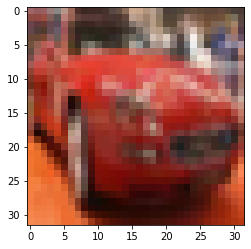

In [5]:
plt.imshow(x_train[5])

# Limpieza

In [6]:
#x_train = x_train.astype('float32') / 255
#x_test = x_test.astype('float32') / 255
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
num_clases = len(np.unique(y_train))
y_train = to_categorical(y_train, num_clases)
y_test = to_categorical(y_test, num_clases)

**Normalization**

In [8]:
mean = np.mean(x_train)
std = np.std(x_train)

In [9]:
x_train = (x_train - mean) / (std + 1e-7)
x_test = (x_test - mean) / (std + 1e-7)

*División de los datos en train, test y validation*

In [10]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print('x_train:', x_train.shape[0])
print('validation:', x_valid.shape[0])
print('test:', x_test.shape[0])

x_train: 45000
validation: 5000
test: 10000


*Creamos el modelo...*

In [11]:
base_filtros = 64
w_regularizer = 1e-4

In [12]:
model = Sequential([
    # Layer 1
    Conv2D(base_filtros, (3,3), padding = 'same', kernel_regularizer=regularizers.l2(w_regularizer), input_shape = x_train.shape[1:]), 
    Activation('relu'),
    BatchNormalization(),
    # Layer 2
    Conv2D(base_filtros, (3,3), padding = 'same', kernel_regularizer=regularizers.l2(w_regularizer)), 
    Activation('relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    # Layer 3
    Conv2D(2*base_filtros, (3,3), padding = 'same', kernel_regularizer=regularizers.l2(w_regularizer)), 
    Activation('relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),
    # Layer 4
    Conv2D(2*base_filtros, (3,3), padding = 'same', kernel_regularizer=regularizers.l2(w_regularizer)), 
    Activation('relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.4),
    # Layer 5
    Conv2D(4*base_filtros, (3,3), padding = 'same', kernel_regularizer=regularizers.l2(w_regularizer)), 
    Activation('relu'),
    BatchNormalization(),
    
    # Layer 6
    Conv2D(4*base_filtros, (3,3), padding = 'same', kernel_regularizer=regularizers.l2(w_regularizer)), 
    Activation('relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.4),
    
    # Clasification - Flatten
    Flatten(), 
    Dense(num_clases, activation = 'softmax')
    ])
model.summary()

2022-10-23 00:00:09.952760: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-23 00:00:09.953760: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-23 00:00:10.329916: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-23 00:00:10.330858: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-23 00:00:10.331764: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0

In [13]:
data_generator = ImageDataGenerator(rotation_range=15, 
                  width_shift_range=0.1, 
                  height_shift_range=0.1, 
                  horizontal_flip=True, 
                  vertical_flip=True
                  )

### Vamos a compilar y entrenar!

In [14]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(
    learning_rate=0.0001), metrics=['accuracy'])

In [15]:
"""hist = model.fit(x_train, y_train, batch_size=32, epochs=100, 
                validation_data=(x_valid, y_valid), 
                verbose=2, shuffle=True)"""

'hist = model.fit(x_train, y_train, batch_size=32, epochs=100, \n                validation_data=(x_valid, y_valid), \n                verbose=2, shuffle=True)'

In [16]:
checkpoint = ModelCheckpoint('mi_mejor_modelo.hdf5', verbose=1, save_best_only=True, monitor='val_accuracy')

In [17]:
hist = model.fit(data_generator.flow(x_train, y_train, batch_size=128), 
                callbacks=[checkpoint],
                steps_per_epoch=x_train.shape[0]/128,
                epochs=120,
                verbose = 2,
                validation_data=(x_valid, y_valid)
                )

2022-10-23 00:00:16.827953: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/120


2022-10-23 00:00:20.118905: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


351/351 - 39s - loss: 2.9528 - accuracy: 0.2414 - val_loss: 2.7545 - val_accuracy: 0.1772

Epoch 00001: val_accuracy improved from -inf to 0.17720, saving model to mi_mejor_modelo.hdf5
Epoch 2/120
351/351 - 23s - loss: 2.2093 - accuracy: 0.3162 - val_loss: 1.8426 - val_accuracy: 0.3436

Epoch 00002: val_accuracy improved from 0.17720 to 0.34360, saving model to mi_mejor_modelo.hdf5
Epoch 3/120
351/351 - 22s - loss: 2.0011 - accuracy: 0.3635 - val_loss: 1.8536 - val_accuracy: 0.3310

Epoch 00003: val_accuracy did not improve from 0.34360
Epoch 4/120
351/351 - 22s - loss: 1.8752 - accuracy: 0.3945 - val_loss: 2.0268 - val_accuracy: 0.3054

Epoch 00004: val_accuracy did not improve from 0.34360
Epoch 5/120
351/351 - 22s - loss: 1.8075 - accuracy: 0.4192 - val_loss: 2.0974 - val_accuracy: 0.3114

Epoch 00005: val_accuracy did not improve from 0.34360
Epoch 6/120
351/351 - 23s - loss: 1.7214 - accuracy: 0.4394 - val_loss: 2.1228 - val_accuracy: 0.3078

Epoch 00006: val_accuracy did not impr

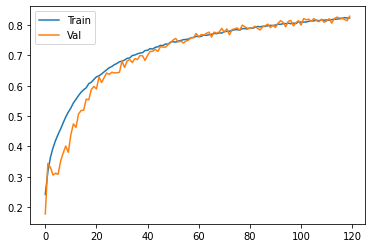

In [18]:
plt.plot(hist.history['accuracy'], label='Train')
plt.plot(hist.history['val_accuracy'], label='Val')
plt.legend()
plt.show()

In [19]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6362 - accuracy: 0.8130


[0.6362258195877075, 0.8130000233650208]

## Vamos a compilar un modelo similar pero usando AveragePooling2D en vez de MaxPooling2D

In [20]:
model2 = Sequential([
    # Layer 1
    Conv2D(base_filtros, (3,3), padding = 'same', kernel_regularizer=regularizers.l2(w_regularizer), input_shape = x_train.shape[1:]), 
    Activation('relu'), 
    # Layer 2
    Conv2D(base_filtros, (3,3), padding = 'same', kernel_regularizer=regularizers.l2(w_regularizer)), 
    Activation('relu'),
    AveragePooling2D(pool_size=(2,2)),
    Dropout(0.2),
    # Layer 3
    Conv2D(2*base_filtros, (3,3), padding = 'same', kernel_regularizer=regularizers.l2(w_regularizer)), 
    Activation('relu'),
    AveragePooling2D(pool_size=(2,2)),
    Dropout(0.3),
    # Layer 4
    Conv2D(2*base_filtros, (3,3), padding = 'same', kernel_regularizer=regularizers.l2(w_regularizer)), 
    Activation('relu'),
    AveragePooling2D(pool_size=(2,2)),
    Dropout(0.4),
    # Layer 5
    Conv2D(4*base_filtros, (3,3), padding = 'same', kernel_regularizer=regularizers.l2(w_regularizer)), 
    Activation('relu'),
    
    # Layer 6
    Conv2D(4*base_filtros, (3,3), padding = 'same', kernel_regularizer=regularizers.l2(w_regularizer)), 
    Activation('relu'),
    AveragePooling2D(pool_size=(2,2)),
    Dropout(0.4),
    
    # Clasification - Flatten
    Flatten(), 
    Dense(num_clases, activation = 'softmax')
    ])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 128)      

In [21]:
model2.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(
    learning_rate=0.001), metrics=['accuracy'])

In [22]:
hist2 = model2.fit(x_train, y_train, batch_size=32, epochs=100, 
                validation_data=(x_valid, y_valid), 
                verbose=2, shuffle=True)

Epoch 1/100
1407/1407 - 11s - loss: 1.6456 - accuracy: 0.4038 - val_loss: 1.3474 - val_accuracy: 0.5306
Epoch 2/100
1407/1407 - 9s - loss: 1.2671 - accuracy: 0.5687 - val_loss: 1.1003 - val_accuracy: 0.6324
Epoch 3/100
1407/1407 - 9s - loss: 1.1044 - accuracy: 0.6385 - val_loss: 1.0047 - val_accuracy: 0.6756
Epoch 4/100
1407/1407 - 9s - loss: 1.0238 - accuracy: 0.6760 - val_loss: 0.8803 - val_accuracy: 0.7238
Epoch 5/100
1407/1407 - 9s - loss: 0.9640 - accuracy: 0.7020 - val_loss: 0.8713 - val_accuracy: 0.7334
Epoch 6/100
1407/1407 - 9s - loss: 0.9287 - accuracy: 0.7202 - val_loss: 0.8479 - val_accuracy: 0.7444
Epoch 7/100
1407/1407 - 9s - loss: 0.9005 - accuracy: 0.7338 - val_loss: 0.8722 - val_accuracy: 0.7500
Epoch 8/100
1407/1407 - 9s - loss: 0.8808 - accuracy: 0.7434 - val_loss: 0.8095 - val_accuracy: 0.7718
Epoch 9/100
1407/1407 - 9s - loss: 0.8619 - accuracy: 0.7531 - val_loss: 0.7797 - val_accuracy: 0.7792
Epoch 10/100
1407/1407 - 9s - loss: 0.8488 - accuracy: 0.7603 - val_loss

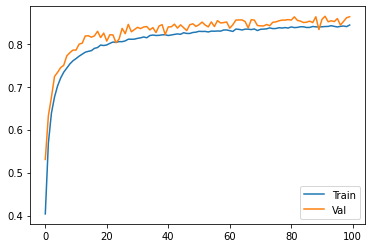

In [23]:
plt.plot(hist2.history['accuracy'], label='Train')
plt.plot(hist2.history['val_accuracy'], label='Val')
plt.legend()
plt.show()

In [24]:
model2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6853 - accuracy: 0.8449


[0.6853400468826294, 0.8449000120162964]